## Bitcoin Price Analysis Before the 2024 Halving

This project aims to analyse Bitcoin's price movements leading up to the anticipated 2024 halving event. The analysis encompasses various steps, including data collection, preprocessing, exploratory data analysis (EDA), model selection, training, evaluation, predictive analysis, fine-tuning, monitoring and updating.

1. **Data Collection:** Historical Bitcoin price data was gathered from a CSV file downloaded from an online source.

2. **Data Preprocessing:** Missing values were handled, timestamps were converted to datetime format, and additional features such as daily returns and rolling averages were calculated.

3. **Exploratory Data Analysis (EDA):** Visual analysis was conducted to observe price trends and fluctuations. Line plots were used to visualise Bitcoin price over time, while high and low prices were plotted to identify price ranges. Histograms were utilised to analyse the distribution of daily returns.

4. **Model Selection:** Linear Regression was selected as the machine learning model due to its suitability for continuous variable prediction.

5. **Model Training:** The data was split into training and testing sets (80/20), and the Linear Regression model was trained on the training data.

6. **Model Evaluation:** Model performance was assessed using mean squared error on the testing data.

7. **Predictive Analysis:** The trained model was utilised to forecast Bitcoin prices post-halving.

8. **Fine-Tuning:** Parameter adjustment and algorithm optimization were explored to enhance model accuracy.

9. **Monitoring and Updating:** Continuous model monitoring and updating with new data were emphasised to maintain relevance and accuracy over time.

This project demonstrates Python's capability in analyzing Bitcoin price movements and making informed predictions in the dynamic landscape of cryptocurrency markets.


# Step 1: Data Collection

In [1]:
import pandas as pd

In [2]:
# File path to the CSV containing Bitcoin price data
file_path = r"C:\Users\USER\Downloads\BTC-USD Yahoo Finance - Max Yrs.csv"

In [3]:
# Load the data from the CSV file
bitcoin_data_csv = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the DataFrame to verify data loading
bitcoin_data_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Step 2: Data Preprocessing

In [5]:
# Check for missing values
missing_values = bitcoin_data_csv.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Convert 'Date' column to datetime
bitcoin_data_csv['Date'] = pd.to_datetime(bitcoin_data_csv['Date'])

In [7]:
# Calculate additional features: Daily Returns and Rolling Averages
bitcoin_data_csv['Daily_Returns'] = bitcoin_data_csv['Close'].pct_change()
bitcoin_data_csv['Rolling_Average'] = bitcoin_data_csv['Close'].rolling(window=30).mean()

In [8]:
# Drop rows with missing values
bitcoin_data_csv.dropna(inplace=True)

In [9]:
# Display the updated DataFrame
bitcoin_data_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Rolling_Average
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000,-0.030947,384.112801
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700,0.003142,381.660267
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800,0.020023,380.560333
32,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570,-0.004844,380.385333
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,-0.017202,379.516700


# Step 3: Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt

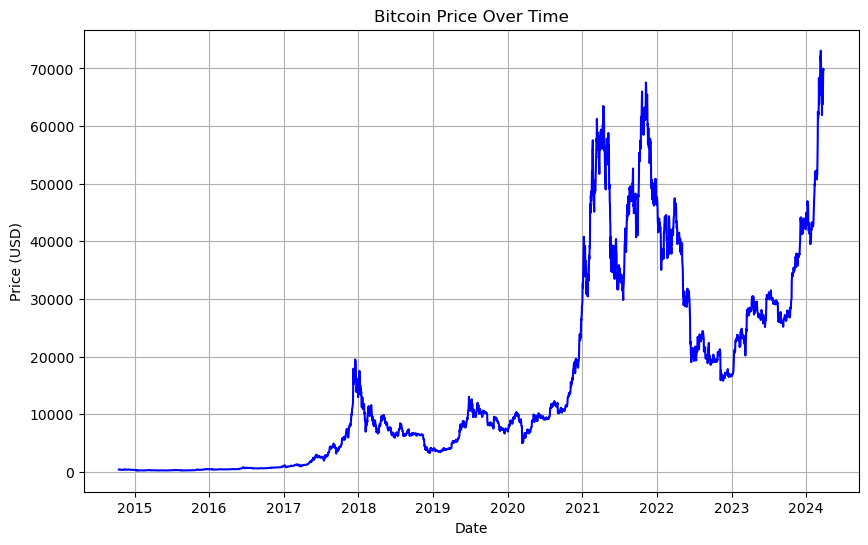

In [11]:
# Line plot to visualize Bitcoin price over time
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data_csv['Date'], bitcoin_data_csv['Close'], color='blue')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

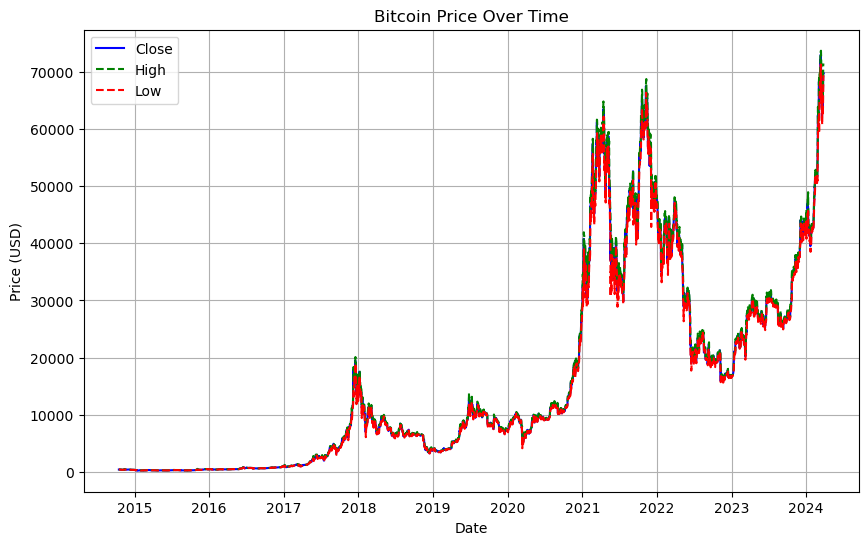

In [12]:
# Plot Bitcoin price over time with high and low prices indicated
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data_csv['Date'], bitcoin_data_csv['Close'], color='blue', label='Close')
plt.plot(bitcoin_data_csv['Date'], bitcoin_data_csv['High'], color='green', linestyle='--', label='High')
plt.plot(bitcoin_data_csv['Date'], bitcoin_data_csv['Low'], color='red', linestyle='--', label='Low')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

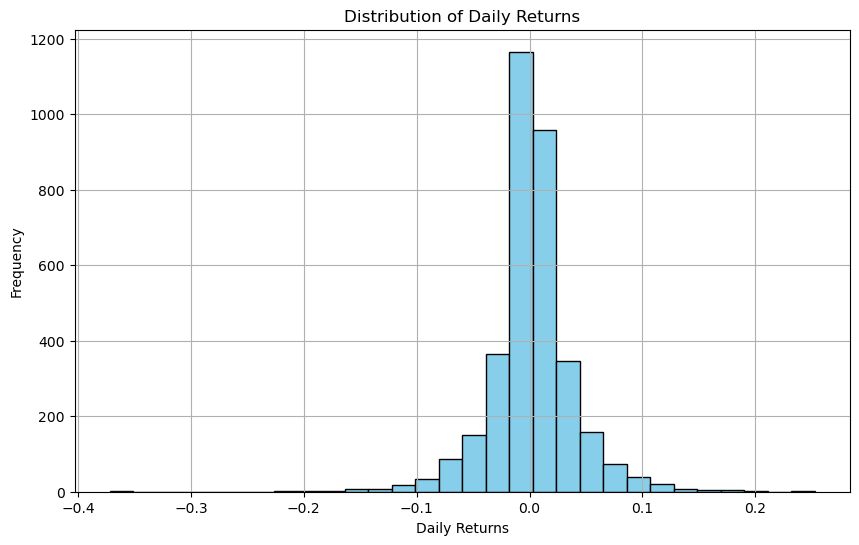

In [13]:
# Histogram to analyze the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(bitcoin_data_csv['Daily_Returns'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Model Selection

In [14]:
from sklearn.linear_model import LinearRegression

C:\Anaconda Feenah\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
# Initialize the Linear Regression model
model = LinearRegression()

# Step 5: Model Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Assuming 'Date' column needs to be dropped for model training
X = bitcoin_data_csv[['Daily_Returns', 'Rolling_Average']]
y = bitcoin_data_csv['Close']

In [18]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize the Linear Regression model
model = LinearRegression()

In [20]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# Step 6: Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [23]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6421116.89340965


# Step 7: Predictive Analysis

In [24]:
# Assuming 'Date', 'Daily_Returns', and 'Rolling_Average' are the features used for training
features_for_prediction = bitcoin_data_csv[['Daily_Returns', 'Rolling_Average']]

In [25]:
# Use the trained model to make predictions
predicted_prices = model.predict(features_for_prediction)

In [26]:
# Print the predicted prices
print("Predicted Prices:", predicted_prices)

Predicted Prices: [-6.05114386e+01  4.85743284e+02  7.56367271e+02 ...  6.66260378e+04
  6.71027772e+04  6.70259839e+04]


In [27]:
# Create a new DataFrame with the predicted prices
predicted_prices_df = pd.DataFrame({'Predicted_Price': predicted_prices})

In [28]:
# Display the DataFrame
print(predicted_prices_df)

      Predicted_Price
0          -60.511439
1          485.743284
2          756.367271
3          355.903153
4          156.084561
...               ...
3445     64419.172473
3446     65342.815163
3447     66626.037798
3448     67102.777208
3449     67025.983854

[3450 rows x 1 columns]


# Step 8: Fine-Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Define the parameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [31]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

In [32]:
# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

C:\Anaconda Feenah\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Anaconda Feenah\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeli

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [33]:
# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'fit_intercept': False, 'normalize': True}


In [34]:
# Use the best parameters to initialize the model
best_model = LinearRegression(**best_params)

In [35]:
# Fit the model to the training data
best_model.fit(X_train, y_train)

C:\Anaconda Feenah\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(fit_intercept=False, normalize=True)

In [36]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)

In [37]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) after fine-tuning:", mse)

Mean Squared Error (MSE) after fine-tuning: 6421552.345677602
